<a href="https://colab.research.google.com/github/AldoEHF14/SciKitLearn-Machine-Learning/blob/main/Frecuencia_de_palabras_Recomendaciones.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Frecuencia de palabras | Recomendaciones

 Mostramos cómo convertir las palabras (texto) a números, para poder obtener la puntuación (score) de cada palabra, de acuerdo al número de veces que aparecen en un texto o corpus. Utilizando CountVectorizer de ScikitLearn es muy sencillo, lo hacemos con palabra en Inglés y en Español.

Scikit Learn | CountVectorizer:
[link](https://scikit-learn.org/stable/modules/generated/sklearn.feature_extraction.text.CountVectorizer.html)

Descarga la librería para las stop words:
[link](https://pypi.org/project/stop-words/)


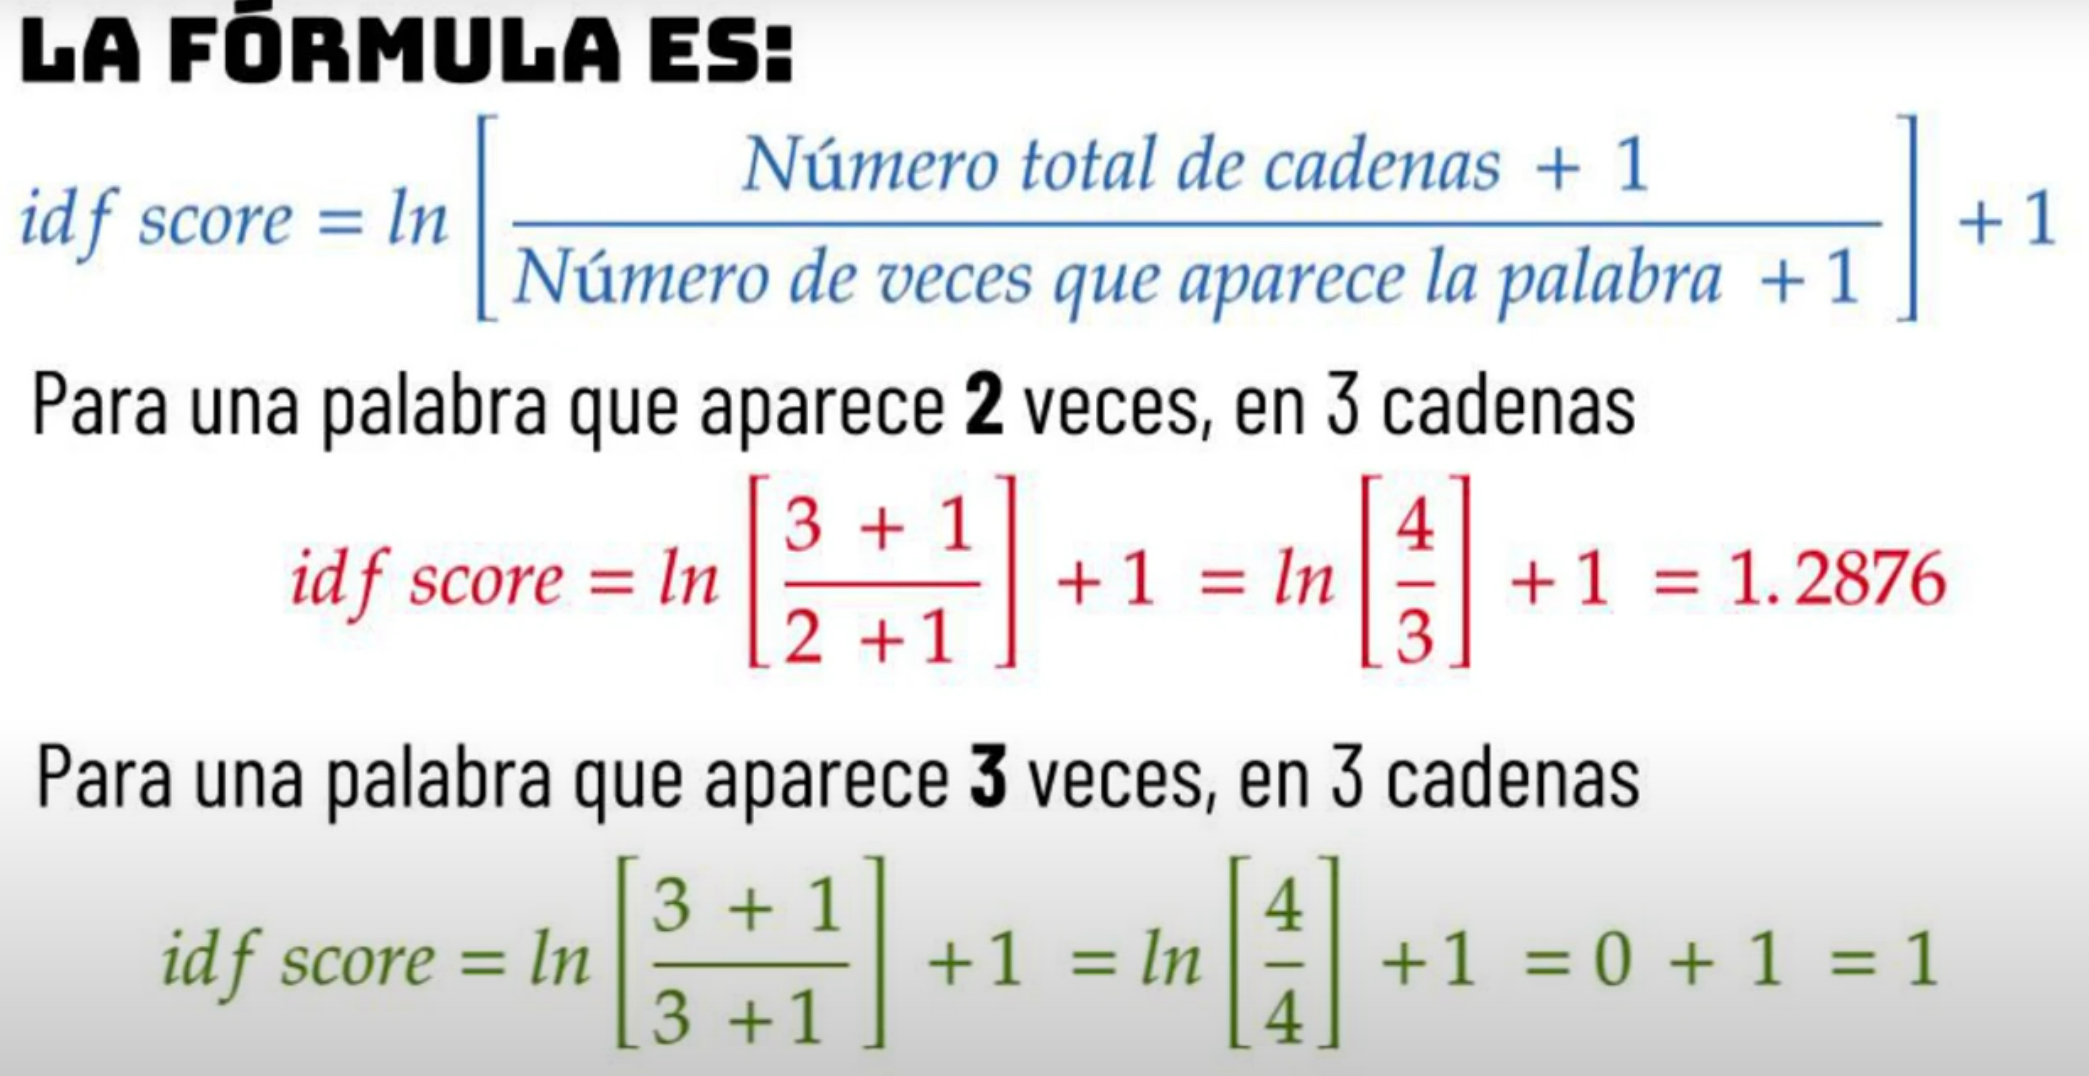

In [7]:
!pip install stop-words


  Preparing metadata (setup.py) ... done
  Created wheel for stop-words: filename=stop_words-2018.7.23-py3-none-any.whl size=32894 sha256=fbd6030ae582dbfbc6f5a9f31c6d935fd5688e8634d327515c84e597c4aaaef1
  Stored in directory: /root/.cache/pip/wheels/8f/a5/51/a5405e1da5d178491b79d12cc81b6cb9bb14fe2c8c632eba70
Successfully built stop-words


In [9]:
from sklearn.feature_extraction.text import CountVectorizer, TfidfTransformer
# data = ['I like the dog and dog and cat', 'I love the dog cat', 'I interested in a dog turtle']
from stop_words import get_stop_words

# Obtener lista de stopwords en español
espa = get_stop_words('spanish')

data = ['Yo quiero aquel gato', 'Yo quiero perro', 'Yo quiero aquel puerco']

# cv=CountVectorizer(stop_words="english")
cv=CountVectorizer(stop_words=espa)

# Token = Cadena de caracteres con un significado
data = cv.fit_transform(data)
print(cv.vocabulary_)

print("Frecuencias")
print(data)

print("Matriz")
print(data.toarray())

# Transformar texto en numeros
tfidf_transformer = TfidfTransformer()
tfidf_matrix = tfidf_transformer.fit_transform(data)

# Crear un diccionario y zip para unir dos pares de datos
palabras = dict(zip(cv.get_feature_names_out(), tfidf_transformer.idf_))

for palabra, puntuacion in palabras.items():
  print(palabra,puntuacion)

# print("Puntuacion de perro:",palabras["dog"])
print("Puntuacion de perro:",palabras["perro"])


{'quiero': 4, 'aquel': 0, 'gato': 1, 'perro': 2, 'puerco': 3}
Frecuencias
<Compressed Sparse Row sparse matrix of dtype 'int64'
	with 8 stored elements and shape (3, 5)>
  Coords	Values
  (0, 4)	1
  (0, 0)	1
  (0, 1)	1
  (1, 4)	1
  (1, 2)	1
  (2, 4)	1
  (2, 0)	1
  (2, 3)	1
Matriz
[[1 1 0 0 1]
 [0 0 1 0 1]
 [1 0 0 1 1]]
aquel 1.2876820724517808
gato 1.6931471805599454
perro 1.6931471805599454
puerco 1.6931471805599454
quiero 1.0
Puntuacion de perro: 1.6931471805599454
